In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import csv


options = Options()
options.add_argument("--start-maximized")

driver = webdriver.Chrome(options=options)

driver.get("https://eksisozluk.com/basliklar--1208965?nr=true&rf=basliklar")
time.sleep(5)

with open("arac.txt", "r", encoding="utf-8") as file:
    arac_listesi = [line.strip() for line in file]

with open('entries.csv', mode='w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Araç', 'Sayfa', 'Başlık', 'Entry No', 'Entry Metni']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    for arac in arac_listesi:
        print(f"\n🔍 Araç: {arac}")

        try:
            input_btn = driver.find_element(By.XPATH, '/html/body/header/div/form[1]/input')
            input_btn.clear()
            input_btn.send_keys(arac)

            search_btn = driver.find_element(By.XPATH, '/html/body/header/div/form[1]/button')
            search_btn.click()
            time.sleep(5)

            current_url = driver.current_url
            print("🌐 URL:", current_url)

            for page_number in range(2, 100):
                driver.get(f"{current_url}?p={page_number}")
                page_source = driver.page_source
                soup = BeautifulSoup(page_source, "html.parser")

              
                try:
                    baslik = soup.find("h1").text.strip()
                    print(f"\n📌 Başlık: {baslik}")
                except:
                    print("Başlık bulunamadı.")

                entries = soup.select("ul li div.content")
                if not entries:
                    print("⚠️ Entry bulunamadı.")
                    continue

                for idx, entry in enumerate(entries, 1):
                    writer.writerow({
                        'Araç': arac,
                        'Sayfa': page_number,
                        'Başlık': baslik,
                        'Entry No': idx,
                        'Entry Metni': entry.text.strip()
                    })
                    print(f"\n💬 {idx}. Entry:\n{entry.text.strip()}\n{'-' * 40}")

        except Exception as e:
            print("🚫 Hata:", e)

        time.sleep(2)

driver.quit()



🔍 Araç: fiat egea
🌐 URL: https://eksisozluk.com/fiat-egea--4793100

📌 Başlık: fiat egea

💬 1. Entry:
baya güzel olmuş lan vay anasını sayın seyirciler.
----------------------------------------

💬 2. Entry:
-ben fiyat eğöörm istiyom.+abi linea verelim?-iyi olur. vade kaç?tanım: yeni fiat modeli.
----------------------------------------

💬 3. Entry:
fiat'ın yeni mondeo'su.
----------------------------------------

💬 4. Entry:
autoweek hollanda bu araba hakkında şunları yazmış; (3 tane de böyük resim koymuş)http://www.autoweek.nl/…/read.php?4,5440738,5440739
----------------------------------------

💬 5. Entry:
ön taraftan bakınca her şeye benzettiğim araba. özellikle superb, jetta, passat ...
----------------------------------------

💬 6. Entry:
türkiyenin yeni sarı taksisi
----------------------------------------

💬 7. Entry:
ucuz c segmenti furyasına ait citroen c-elysee müşterilerinden çalabilir.
----------------------------------------

💬 8. Entry:
epeydir sözü edilen bir otomobildi

In [7]:
import csv

entry_listesi = []

with open("entries.csv", "r", encoding="utf-8") as file:

    reader = csv.DictReader(file)
    for row in reader:
        entry_listesi.append(row['Entry Metni'])


In [3]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('turkish'))

df = pd.read_csv('entries.csv')

punctuations = set(string.punctuation)

def tokenize_and_clean(text):
    text = str(text).lower()
    tokens = word_tokenize(text, language='turkish')
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations]
    return tokens

df['tokenized'] = df['Entry Metni'].apply(tokenize_and_clean)

print(df[['Entry Metni', 'tokenized']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tolgatarhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tolgatarhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                         Entry Metni  \
0  baya güzel olmuş lan vay anasını sayın seyirci...   
1  -ben fiyat eğöörm istiyom.+abi linea verelim?-...   
2                            fiat'ın yeni mondeo'su.   
3  autoweek hollanda bu araba hakkında şunları ya...   
4  ön taraftan bakınca her şeye benzettiğim araba...   

                                           tokenized  
0  [baya, güzel, olmuş, lan, vay, anasını, sayın,...  
1  [-ben, fiyat, eğöörm, istiyom.+abi, linea, ver...  
2                         [fiat'ın, yeni, mondeo'su]  
3  [autoweek, hollanda, araba, hakkında, şunları,...  
4  [ön, taraftan, bakınca, şeye, benzettiğim, ara...  


In [4]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('turkish'))

punctuations = set(string.punctuation)

df = pd.read_csv('entries.csv')

def clean_tokens(text):
    try:
        tokens = word_tokenize(str(text).lower(), language='turkish')
        cleaned = [word for word in tokens if word not in stop_words and word not in punctuations]
        return cleaned
    except:
        return []

df['tokens'] = df['Entry Metni'].apply(clean_tokens)

print(df[['Entry Metni', 'tokens']].head())

df.to_csv('cleaned_entries.csv', index=False, encoding='utf-8')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tolgatarhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tolgatarhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                         Entry Metni  \
0  baya güzel olmuş lan vay anasını sayın seyirci...   
1  -ben fiyat eğöörm istiyom.+abi linea verelim?-...   
2                            fiat'ın yeni mondeo'su.   
3  autoweek hollanda bu araba hakkında şunları ya...   
4  ön taraftan bakınca her şeye benzettiğim araba...   

                                              tokens  
0  [baya, güzel, olmuş, lan, vay, anasını, sayın,...  
1  [-ben, fiyat, eğöörm, istiyom.+abi, linea, ver...  
2                         [fiat'ın, yeni, mondeo'su]  
3  [autoweek, hollanda, araba, hakkında, şunları,...  
4  [ön, taraftan, bakınca, şeye, benzettiğim, ara...  


In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import csv
from zemberek import TurkishMorphology
from zemberek import TurkishSentenceNormalizer

morphology = TurkishMorphology.create_with_defaults()
normalizer = TurkishSentenceNormalizer(morphology)

options = Options()
options.add_argument("--start-maximized")

driver = webdriver.Chrome(options=options)

driver.get("https://eksisozluk.com/basliklar--1208965?nr=true&rf=basliklar")
time.sleep(5)

with open("arac.txt", "r", encoding="utf-8") as file:
    arac_listesi = [line.strip() for line in file]

with open('entries.csv', mode='w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Araç', 'Sayfa', 'Başlık', 'Entry No', 'Entry Metni', 'Lemmatize Entry Metni']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    for arac in arac_listesi:
        print(f"\n🔍 Araç: {arac}")

        try:
            print("⏳ Arama kutusuna araç ismi yazılıyor...")
            input_btn = driver.find_element(By.XPATH, '/html/body/header/div/form[1]/input')
            input_btn.clear()
            input_btn.send_keys(arac)

            search_btn = driver.find_element(By.XPATH, '/html/body/header/div/form[1]/button')
            search_btn.click()
            time.sleep(5)

            current_url = driver.current_url
            print("🌐 URL:", current_url)

            for page_number in range(2, 100):
                print(f"📄 Sayfa {page_number} yükleniyor...")
                driver.get(f"{current_url}?p={page_number}")
                page_source = driver.page_source
                soup = BeautifulSoup(page_source, "html.parser")

                try:
                    baslik = soup.find("h1").text.strip()
                    print(f"\n📌 Başlık: {baslik}")
                except Exception as e:
                    print(f"Başlık bulunamadı. Hata: {e}")

                entries = soup.select("ul li div.content")
                if not entries:
                    print("⚠️ Entry bulunamadı.")
                    continue

                for idx, entry in enumerate(entries, 1):
                    entry_metni = entry.text.strip()
                    try:
                        lemmatized_entry = normalizer.normalize(entry_metni)
                    except Exception as e:
                        lemmatized_entry = entry_metni
                        print(f"⚠️ Lemmatize hatası: {e}")

                    writer.writerow({
                        'Araç': arac,
                        'Sayfa': page_number,
                        'Başlık': baslik,
                        'Entry No': idx,
                        'Entry Metni': entry_metni,
                        'Lemmatize Entry Metni': lemmatized_entry
                    })
                    print(f"\n💬 {idx}. Entry:\n{entry_metni}\nLemmatize Edilmiş:\n{lemmatized_entry}\n{'-' * 40}")

        except Exception as e:
            print("🚫 Hata:", e)

        time.sleep(2)

driver.quit()


2025-05-03 16:51:16,291 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 6.902659893035889


🔍 Araç: fiat egea
⏳ Arama kutusuna araç ismi yazılıyor...
🌐 URL: https://eksisozluk.com/fiat-egea--4793100
📄 Sayfa 2 yükleniyor...

📌 Başlık: fiat egea

💬 1. Entry:
baya güzel olmuş lan vay anasını sayın seyirciler.
Lemmatize Edilmiş:
baya güzel olmuş lan vay anasını sayın seyirciler .
----------------------------------------

💬 2. Entry:
-ben fiyat eğöörm istiyom.+abi linea verelim?-iyi olur. vade kaç?tanım: yeni fiat modeli.
Lemmatize Edilmiş:
- ben fiyat egoorm istiyorum . + abi linea verelim ? - iyi olur . vade kaç ? tanım : yeni fiat modeli .
----------------------------------------

💬 3. Entry:
fiat'ın yeni mondeo'su.
Lemmatize Edilmiş:
fiat'ın yeni mondeosu .
----------------------------------------

💬 4. Entry:
autoweek hollanda bu araba hakkında şunları yazmış; (3 tane de böyük resim koymuş)http://www.autoweek.nl/…/read.php?4,5440738,544073

In [6]:
from TurkishStemmer import TurkishStemmer
import pandas as pd

df = pd.read_csv("entries.csv")

stemmer = TurkishStemmer()

df["Stemli Entry"] = df["Entry Metni"].apply(lambda text: " ".join([stemmer.stem(word) for word in text.split()]))

df.to_csv("entries_stemli.csv", index=False)

print("✅ Stem işlemi tamamlandı. entries_stemli.csv dosyasına kaydedildi.")


✅ Stem işlemi tamamlandı. entries_stemli.csv dosyasına kaydedildi.


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("entries.csv")

if 'Koklu Entry' in df.columns:
    texts = df['Koklu Entry'].fillna("").astype(str).tolist()
else:
    print("⚠️ Uyarı: 'Koklu Entry' sütunu bulunamadı, 'Entry Metni' kullanılıyor.")
    texts = df['Entry Metni'].fillna("").astype(str).tolist()

turkce_stopwords = [
    "ve", "bir", "bu", "da", "de", "ile", "için", "ama", "çok", "gibi", 
    "daha", "şu", "mi", "mu", "mü", "ben", "sen", "o", "biz", "siz", "onlar"
]

vectorizer = TfidfVectorizer(max_features=1000, stop_words=turkce_stopwords)
tfidf_matrix = vectorizer.fit_transform(texts)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df.to_csv("tfidf_stemli.csv", index=False)
print("✅ TF-IDF vektörleme tamamlandı. 'tfidf_stemli.csv' dosyası oluşturuldu.")


⚠️ Uyarı: 'Koklu Entry' sütunu bulunamadı, 'Entry Metni' kullanılıyor.
✅ TF-IDF vektörleme tamamlandı. 'tfidf_stemli.csv' dosyası oluşturuldu.


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("entries.csv")

if 'Lemali Entry' in df.columns:
    texts = df['Lemali Entry'].fillna("").astype(str).tolist()
else:
    print("⚠️ 'Lemali Entry' sütunu bulunamadı, 'Entry Metni' kullanılacak.")
    texts = df['Entry Metni'].fillna("").astype(str).tolist()

turkce_stopwords = [
    "ve", "bir", "bu", "da", "de", "ile", "için", "ama", "çok", "gibi", 
    "daha", "şu", "mi", "mu", "mü", "ben", "sen", "o", "biz", "siz", "onlar"
]

vectorizer = TfidfVectorizer(max_features=1000, stop_words=turkce_stopwords)
tfidf_matrix = vectorizer.fit_transform(texts)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.to_csv("tfidf_lema.csv", index=False)

print("✅ TF-IDF vektörleme tamamlandı. Sonuçlar 'tfidf_lema.csv' dosyasına kaydedildi.")


⚠️ 'Lemali Entry' sütunu bulunamadı, 'Entry Metni' kullanılacak.
✅ TF-IDF vektörleme tamamlandı. Sonuçlar 'tfidf_lema.csv' dosyasına kaydedildi.


In [8]:
import pandas as pd
import numpy as np
import re
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')

data = pd.read_csv("entries.csv") 
comments = data['Lemmatize Entry Metni'].dropna().tolist()  

def clean_text(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text)  
    return text

comments = [clean_text(comment) for comment in comments]

tokenized_comments = [word_tokenize(comment) for comment in comments]

stop_words = set(stopwords.words('turkish'))
tokenized_comments = [
    [word for word in comment if word not in stop_words] for comment in tokenized_comments
]

model = Word2Vec(sentences=tokenized_comments, vector_size=100, window=5, min_count=1, sg=0)

model.save("otomobil_word2vec.model")

word_vector = model.wv['araba'] 
print(word_vector)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tolgatarhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tolgatarhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[-0.06222025  0.18662412  0.09932119  0.06353727 -0.05046185 -0.358581
  0.04856816  0.46494392 -0.19381267 -0.10748413 -0.02169617 -0.25369734
 -0.09151189  0.09899981  0.08090265 -0.12613903  0.05545385 -0.2685946
  0.06637612 -0.40305522  0.10336615  0.10489631  0.1632178  -0.07560758
  0.03434597 -0.06081265 -0.18526763 -0.00068658 -0.21534707  0.02154757
  0.20640022  0.02164037  0.05680996 -0.19071871 -0.05080483  0.27840683
  0.05379478 -0.10212991 -0.10732181 -0.36805308  0.04605262 -0.2148602
 -0.09483884  0.0205519   0.14461501 -0.12009671 -0.20340686 -0.03756538
  0.08079882  0.19495215  0.12654822 -0.15374583 -0.08720119 -0.05907061
 -0.14108472  0.10900959  0.15617749  0.00066328 -0.18301596  0.02691052
  0.07206875  0.0193713  -0.00437491  0.02402001 -0.2325116   0.1448921
  0.05794517  0.10442862 -0.25054023  0.25752673 -0.10411624  0.12666309
  0.23999266 -0.02114295  0.22214632  0.12894745  0.05046986 -0.00105915
 -0.19851802  0.02589462 -0.13363048  0.0342939  -0.1534

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tolgatarhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tolgatarhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Index(['Araç', 'Sayfa', 'Başlık', 'Entry No', 'Entry Metni',
       'Lemmatize Entry Metni'],
      dtype='object')


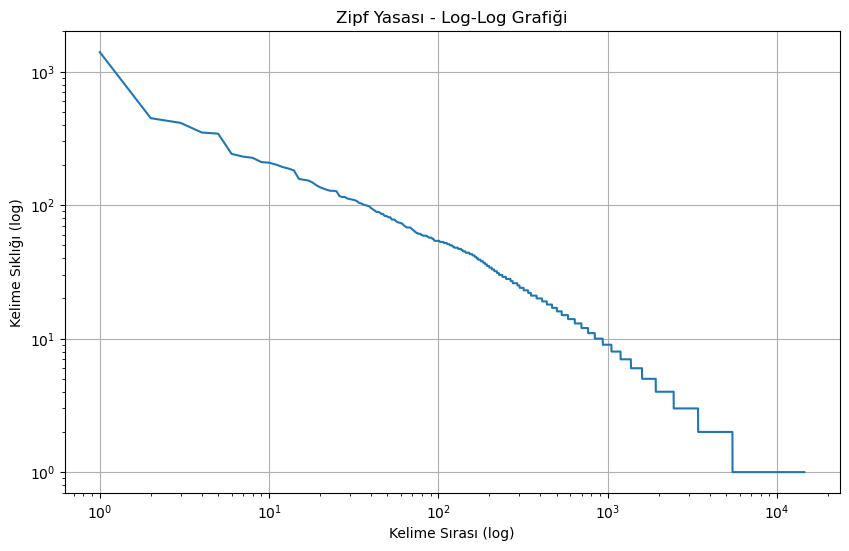

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')
data = pd.read_csv("entries.csv")

print(data.columns)  

comments = data['Lemmatize Entry Metni'].dropna().tolist()

text = " ".join(comments)

tokens = word_tokenize(text.lower())
tokens = [t for t in tokens if t.isalpha()] 
tokens = [t for t in tokens if t not in stopwords.words('turkish')]  

freq_dist = Counter(tokens)

sorted_freqs = sorted(freq_dist.values(), reverse=True)

ranks = range(1, len(sorted_freqs) + 1)

plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_freqs)
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Kelime Sıklığı (log)")
plt.title("Zipf Yasası - Log-Log Grafiği")
plt.grid(True)
plt.show()
